# Frequency spectrum

In [1]:
from __future__ import division # defines natural divisions like 1./2. = 1/2 = 0.5 and not 1/2 = 0
import pyPamtra  # import pyPamtra
import matplotlib.pyplot as plt  # import ploting modules
import numpy as np # import numpy for arrays, numerical array operations, ....
import pandas as pn # import pandas data analysis library
%matplotlib inline

Create a pyPamtra object

In [2]:
pam = pyPamtra.pyPamtra()

Define the hydrometeor classes. Replace "mie-sphere" by "disabled" to turn off hydrometeor. Everything in SI units!

In [3]:
descriptorFile = np.array([
      #['hydro_name' 'as_ratio' 'liq_ice' 'rho_ms' 'a_ms' 'b_ms' 'alpha_as' 'beta_as' 'moment_in' 'nbin' 'dist_name' 'p_1' 'p_2' 'p_3' 'p_4' 'd_1' 'd_2' 'scat_name' 'vel_size_mod' 'canting']
       ('cwc_q', -99.0, 1, -99.0, -99.0, -99.0, -99.0, -99.0, 3, 1, 'mono', -99.0, -99.0, -99.0, -99.0, 2e-05, -99.0, 'mie-sphere', 'khvorostyanov01_drops', -99.0),
       ('iwc_q', -99.0, -1, -99.0, 130.0, 3.0, 0.684, 2.0, 3, 1, 'mono_cosmo_ice', -99.0, -99.0, -99.0, -99.0, -99.0, -99.0, 'mie-sphere', 'heymsfield10_particles', -99.0),
       ('rwc_q', -99.0, 1, -99.0, -99.0, -99.0, -99.0, -99.0, 3, 50, 'exp', -99.0, -99.0, 8000000.0, -99.0, 0.00012, 0.006, 'mie-sphere', 'khvorostyanov01_drops', -99.0),
       ('swc_q', -99.0, -1, -99.0, 0.038, 2.0, 0.3971, 1.88, 3, 50, 'exp_cosmo_snow', -99.0, -99.0, -99.0, -99.0, 5.1e-11, 0.02, 'mie-sphere', 'heymsfield10_particles', -99.0),
       ('gwc_q', -99.0, -1, -99.0, 169.6, 3.1, -99.0, -99.0, 3, 50, 'exp', -99.0, -99.0, 4000000.0, -99.0, 1e-10, 0.01, 'mie-sphere', 'khvorostyanov01_spheres', -99.0)], 
      dtype=[('hydro_name', 'S15'), ('as_ratio', '<f8'), ('liq_ice', '<i8'), ('rho_ms', '<f8'), ('a_ms', '<f8'), ('b_ms', '<f8'), ('alpha_as', '<f8'), ('beta_as', '<f8'), ('moment_in', '<i8'), ('nbin', '<i8'), ('dist_name', 'S15'), ('p_1', '<f8'), ('p_2', '<f8'), ('p_3', '<f8'), ('p_4', '<f8'), ('d_1', '<f8'), ('d_2', '<f8'), ('scat_name', 'S15'), ('vel_size_mod', 'S30'), ('canting', '<f8')]
      )

Table as panda DataFrame

In [4]:
pn.DataFrame(descriptorFile)

,hydro_name,as_ratio,liq_ice,rho_ms,a_ms,b_ms,alpha_as,beta_as,moment_in,nbin,dist_name,p_1,p_2,p_3,p_4,d_1,d_2,scat_name,vel_size_mod,canting
0,cwc_q,-99.0,1,-99.0,-99.000,-99.0,-99.0000,-99.00,3,1,mono,-99.0,-99.0,-99.0,-99.0,2.000000e-05,-99.000,mie-sphere,khvorostyanov01_drops,-99.0
1,iwc_q,-99.0,-1,-99.0,130.000,3.0,0.6840,2.00,3,1,mono_cosmo_ice,-99.0,-99.0,-99.0,-99.0,-9.900000e+01,-99.000,mie-sphere,heymsfield10_particles,-99.0
2,rwc_q,-99.0,1,-99.0,-99.000,-99.0,-99.0000,-99.00,3,50,exp,-99.0,-99.0,8000000.0,-99.0,1.200000e-04,0.006,mie-sphere,khvorostyanov01_drops,-99.0
3,swc_q,-99.0,-1,-99.0,0.038,2.0,0.3971,1.88,3,50,exp_cosmo_snow,-99.0,-99.0,-99.0,-99.0,5.100000e-11,0.020,mie-sphere,heymsfield10_particles,-99.0
4,gwc_q,-99.0,-1,-99.0,169.600,3.1,-99.0000,-99.00,3,50,exp,-99.0,-99.0,4000000.0,-99.0,1.000000e-10,0.010,mie-sphere,khvorostyanov01_spheres,-99.0


Add hydrometeor information to PAMTRA object

In [5]:
for hyd in descriptorFile: pam.df.addHydrometeor(hyd)

Read profiles into PAMTRA object

In [6]:
pam.readPamtraProfile('/home/mech/workspace/pamtra/profile/example_input.lay')

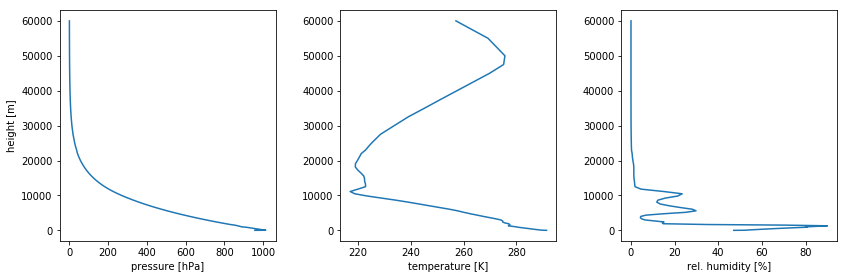

In [7]:
fig = plt.figure(figsize=[12,4])
fig.add_axes([0.1,0.1,0.25,0.8])
plt.plot(pam.p['press'][0,0,:]/100.,pam.p['hgt'][0,0,:])
plt.ylabel('height [m]')
plt.xlabel('pressure [hPa]')
fig.add_axes([0.425,0.1,0.25,0.8])
plt.plot(pam.p['temp'][0,0,:],pam.p['hgt'][0,0,:])
plt.xlabel('temperature [K]')
fig.add_axes([0.75,0.1,0.25,0.8])
plt.plot(pam.p['relhum'][0,0,:],pam.p['hgt'][0,0,:])
plt.xlabel('rel. humidity [%]')
plt.show()

Define frequency grid

In [8]:
freqs = np.arange(10.,200.,1.)

Deactivate active simulations.

In [9]:
pam.nmlSet['active'] = False

Run PAMTRA in parallel mode.

In [10]:
pam.runParallelPamtra(freqs, pp_deltaX=1, pp_deltaY=1, pp_deltaF=10, pp_local_workers="auto")

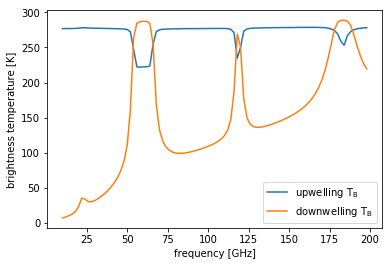

In [11]:
plt.figure()
plt.plot(freqs,pam.r["tb"][0,0,0,0,:,0],label='upwelling T$_\mathrm{B}$')
plt.plot(freqs,pam.r["tb"][0,0,1,31,:,0],label='downwelling T$_\mathrm{B}$')
plt.xlabel('frequency [GHz]')
plt.ylabel('brightness temperature [K]')
plt.legend(loc=4)
plt.show()